correlation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

prices = np.loadtxt("prices.txt")
prices = prices.T
log_returns = np.log(prices[:, 1:] / prices[:, :-1])

In [5]:
returns_df = pd.DataFrame(log_returns.T, columns=[f'Inst_{i}' for i in range(prices.shape[0])])
corr_matrix = returns_df.corr()

corr_pairs = []
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):
        corr = corr_matrix.iloc[i, j]
        corr_pairs.append((corr, f'Inst_{i}', f'Inst_{j}'))

sorted_corr = sorted(corr_pairs, key=lambda x: abs(x[0]), reverse=True)

print("Top 10 most correlated pairs:")
for c, i1, i2 in sorted_corr[:10]:
    print(f"{i1} & {i2}: {c:.4f}")

print("\nTop 10 most negatively correlated pairs:")
neg_corr = [x for x in sorted_corr if x[0] < 0]
for c, i1, i2 in neg_corr[:10]:
    print(f"{i1} & {i2}: {c:.4f}")


Top 10 most correlated pairs:
Inst_18 & Inst_38: 0.1280
Inst_31 & Inst_41: 0.1171
Inst_7 & Inst_38: 0.1148
Inst_13 & Inst_17: 0.1103
Inst_23 & Inst_36: 0.1084
Inst_38 & Inst_39: 0.1080
Inst_13 & Inst_38: 0.1074
Inst_8 & Inst_36: -0.1022
Inst_9 & Inst_13: 0.1016
Inst_12 & Inst_17: 0.0991

Top 10 most negatively correlated pairs:
Inst_8 & Inst_36: -0.1022
Inst_3 & Inst_33: -0.0932
Inst_24 & Inst_40: -0.0931
Inst_12 & Inst_36: -0.0897
Inst_17 & Inst_40: -0.0833
Inst_42 & Inst_48: -0.0831
Inst_1 & Inst_3: -0.0829
Inst_3 & Inst_25: -0.0797
Inst_7 & Inst_9: -0.0778
Inst_17 & Inst_22: -0.0777


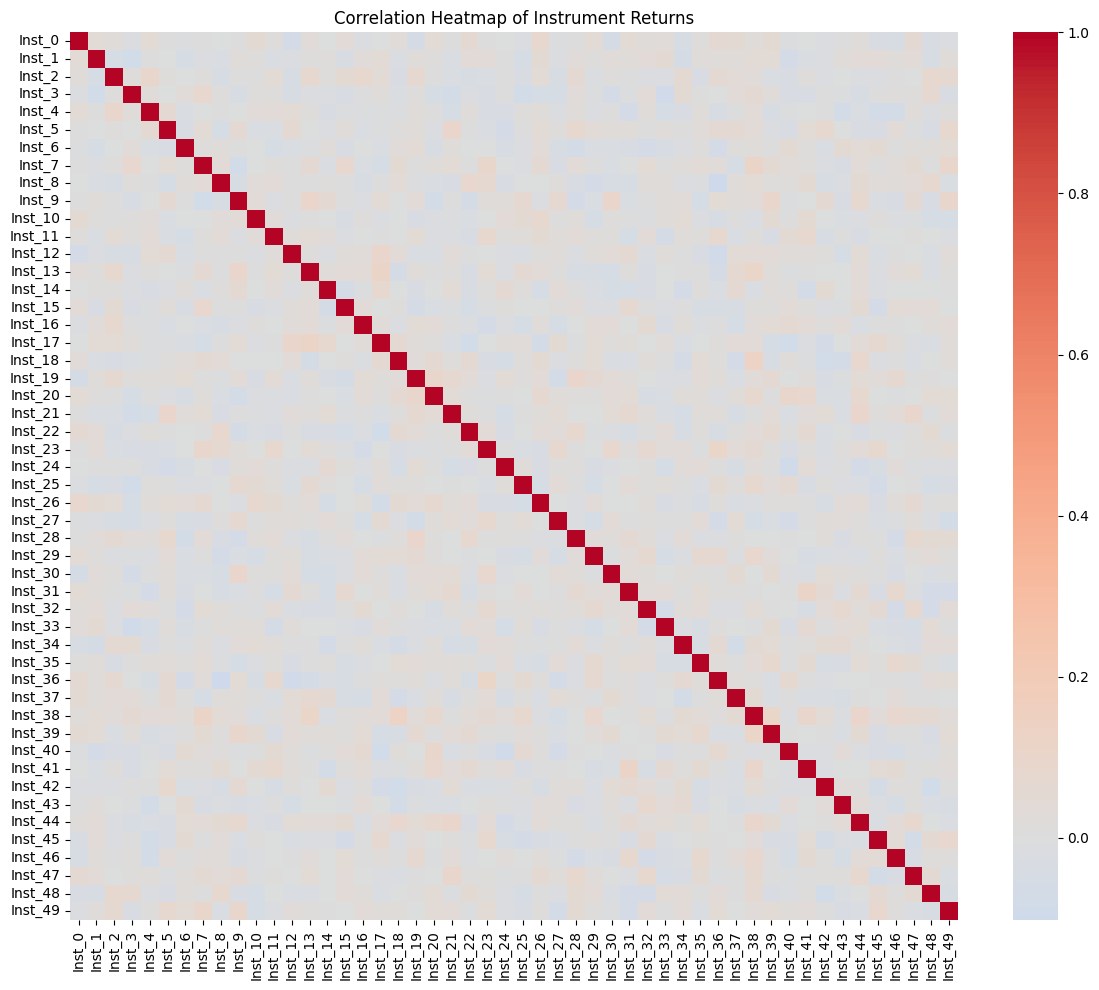

In [6]:
import seaborn as sns

log_returns = np.log(prices[:, 1:] / prices[:, :-1])
returns_df = pd.DataFrame(log_returns.T, columns=[f'Inst_{i}' for i in range(prices.shape[0])])
corr_matrix = returns_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap of Instrument Returns')
plt.tight_layout()
plt.show()


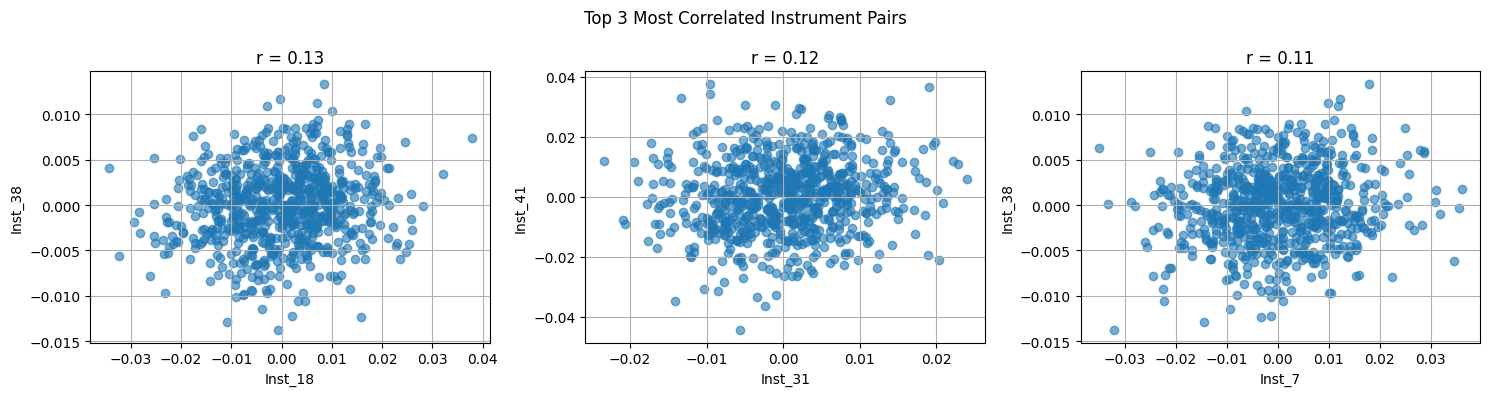

In [7]:
corr_pairs = []
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):
        corr = corr_matrix.iloc[i, j]
        corr_pairs.append((abs(corr), i, j, corr))

top_pairs = sorted(corr_pairs, reverse=True)[:3]

plt.figure(figsize=(15, 4))
for idx, (abs_corr, i, j, corr_val) in enumerate(top_pairs):
    plt.subplot(1, 3, idx + 1)
    plt.scatter(returns_df[f'Inst_{i}'], returns_df[f'Inst_{j}'], alpha=0.6)
    plt.xlabel(f'Inst_{i}')
    plt.ylabel(f'Inst_{j}')
    plt.title(f'r = {corr_val:.2f}')
    plt.grid(True)

plt.suptitle('Top 3 Most Correlated Instrument Pairs')
plt.tight_layout()
plt.show()


#### try lagged?

In [17]:
max_lag = 5
lagged_corrs = []

for lag in range(1, max_lag + 1):
    for i in range(prices.shape[0]):
        for j in range(prices.shape[0]):
            if i == j:
                continue
            x = log_returns[i, lag:]
            y = log_returns[j, :-lag]
            corr = np.corrcoef(x, y)[0, 1]
            lagged_corrs.append({
                'Lag': lag,
                'Leader': f'Inst_{j}',
                'Follower': f'Inst_{i}',
                'Lagged Corr': corr
            })

lagged_corr_df = pd.DataFrame(lagged_corrs)
significant_lagged = lagged_corr_df[lagged_corr_df['Lagged Corr'].abs() > 0.2] # 0.15, probably noise
print(significant_lagged.sort_values(by='Lagged Corr', ascending=False))


Empty DataFrame
Columns: [Lag, Leader, Follower, Lagged Corr]
Index: []


In [1]:
import numpy as np
import pandas as pd

prices = pd.read_csv("prices.txt", sep="\s+", header=None).T
returns = prices.pct_change(axis=1).iloc[:, 1:]
average_return = returns.mean().mean()
print("Average daily return across all instruments and days:", round(average_return, 6))


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wy/ttk8wx_17bz5_tqgb_vfcb9c0000gn/T/ipykernel_84406/2999664810.py:4: SyntaxWarning: invalid escape sequence '\s'
  prices = pd.read_csv("prices.txt", sep="\s+", header=None).T


Average daily return across all instruments and days: 2.7e-05
